Showcasing various merge techniques for two dataframes with differing numbers of values. 

In the subsequent example, we will merge two spectra with varying numbers of frequencies.

In [1]:
import pandas as pd

#load data from TSV

df1 = pd.read_csv('tsv/speech1.tsv', delimiter='\t')
df2 = pd.read_csv('tsv/conga3.tsv', delimiter='\t')

Display the dataframes and plot as 2D Plot

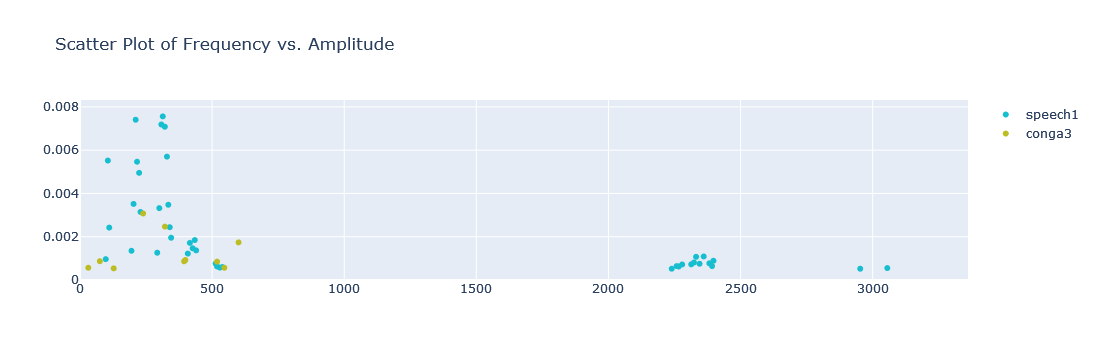

In [3]:
from multiplotter import plot_scatter

#display(df1)
#display(df2)

plot_scatter(dfs=[df1, df2], labels=['speech1', 'conga3'], mode='markers')

In [4]:
# Determine which DataFrame has fewer rows
df_less, df_more = (df1, df2) if len(df1) < len(df2) else (df2, df1)

if df_less.equals(df1):
    print("df2 has more elements")
else:
    print("df1 has more elements")


df1 has more elements


**Equal spread**

Spread values from df with less elements equally

In [5]:
import pandas as pd
import numpy as np

# Function to swap columns
def swap_columns(df, cols1, cols2):
    temp_df = df.copy()
    temp_df[cols1] = df[cols2]
    temp_df[cols2] = df[cols1]
    return temp_df

# Make equal copies of the original DataFram

df1_equal = df1.copy()
df2_equal = df2.copy()

# Determine which DataFrame has fewer rows
df_less, df_more = (df1_equal, df2_equal) if len(df1_equal) < len(df2_equal) else (df2_equal, df1_equal)

# Rename columns for clarity in the intermediate DataFrames
df_less.columns = ['freq_data_less', 'amp_data_less']
df_more.columns = ['freq_data_more', 'amp_data_more']

# Calculate the repeat counts for each row in df_less
repeat_counts = [len(df_more) // len(df_less) + (1 if x < len(df_more) % len(df_less) else 0)  for x in range(len(df_less))]

# Repeat each row in df_less according to the calculated repeat counts
df_less_repeated = pd.DataFrame(np.repeat(df_less.values, repeat_counts, axis=0), columns=df_less.columns)

# Create a new df for final result
result_equal = df_more.copy()

# Add the repeated df_less values to result_equal
result_equal['freq_data_less'] = df_less_repeated['freq_data_less']
result_equal['amp_data_less'] = df_less_repeated['amp_data_less']

# Rename the columns in the final DataFrame
column_mapping = {
    'freq_data_more': 'freq_data1', 
    'amp_data_more': 'amp_data1',
    'freq_data_less': 'freq_data2',
    'amp_data_less': 'amp_data2'
}

result_equal = result_equal.rename(columns=column_mapping)

# Set this to True if you want to swap the columns
should_swap = True

# Swap columns if needed
if should_swap:
    cols_to_swap1 = ['freq_data1', 'amp_data1']
    cols_to_swap2 = ['freq_data2', 'amp_data2']
    result_equal = swap_columns(result_equal, cols_to_swap1, cols_to_swap2)

display(result_equal)


,freq_data1,amp_data1,freq_data2,amp_data2
0,31.25,0.000569,97.368421,0.000965
1,31.25,0.000569,105.263158,0.005521
2,31.25,0.000569,110.526316,0.002423
3,31.25,0.000569,194.736842,0.001351
4,31.25,0.000569,202.631579,0.003517
5,75.00,0.000870,210.526316,0.007408
6,75.00,0.000870,215.789474,0.005467
7,75.00,0.000870,223.684211,0.004954
8,75.00,0.000870,228.947368,0.003144
9,127.50,0.000540,292.105263,0.001261


**Cumulative distribution function**

Cumulative distribution function will be used to spread the values in df with less elements

Determine valid range for all elements to be included:

In [5]:
import pandas as pd
import numpy as np

# Make copies of the original DataFrames
df1_cumuldist = df1.copy()
df2_cumuldist = df2.copy()

# Determine which DataFrame has fewer rows
df_cumuldist_less, df_cumuldist_more = (df1_cumuldist, df2_cumuldist) if len(df1_cumuldist) < len(df2_cumuldist) else (df2_cumuldist, df1_cumuldist)

# Rename columns for clarity in the final DataFrame
df_cumuldist_less.columns = ['freq_data_less', 'amp_data_less']
df_cumuldist_more.columns = ['freq_data_more', 'amp_data_more']

def spread_values(df_cumuldist_less, df_cumuldist_more, power):
    bins = np.linspace(0, 1, len(df_cumuldist_less))**power
    bins[0] = 0
    bins[-1] = 1
    thresholds = (bins[:-1] + bins[1:]) / 2
    df_cumuldist_more_assignment = np.linspace(0, 1, len(df_cumuldist_more), endpoint=False) + 0.5/len(df_cumuldist_more)
    df_cumuldist_more_bins = np.digitize(df_cumuldist_more_assignment, thresholds)
    df_cumuldist_more_bins = np.where(df_cumuldist_more_bins >= len(df_cumuldist_less), len(df_cumuldist_less)-1, df_cumuldist_more_bins)
    df_cumuldist_more_bins[-1] = len(df_cumuldist_less) - 1
    df_cumuldist_more_bins[0] = 0
    df_cumuldist_more['freq_data_less'] = df_cumuldist_less.freq_data_less.iloc[df_cumuldist_more_bins].values
    df_cumuldist_more['amp_data_less'] = df_cumuldist_less.amp_data_less.iloc[df_cumuldist_more_bins].values

    # Return True if all df_less values are present in the resulting df_more, and False otherwise
    return set(df_cumuldist_less.freq_data_less) <= set(df_cumuldist_more.freq_data_less) and set(df_cumuldist_less.amp_data_less) <= set(df_cumuldist_more.amp_data_less)

# Test different power values to find the range that ensures all df_cumuldist_less values are present in df_cumuldist_more
power_values = np.linspace(0.01, 100, 10000)
valid_powers = [power for power in power_values if spread_values(df_cumuldist_less, df_cumuldist_more.copy(), power)]

# The min and max values for power_range
power_range = [min(valid_powers), max(valid_powers)]
print("Power range:", power_range)


Power range: [0.21000000000000002, 1.8900000000000001]


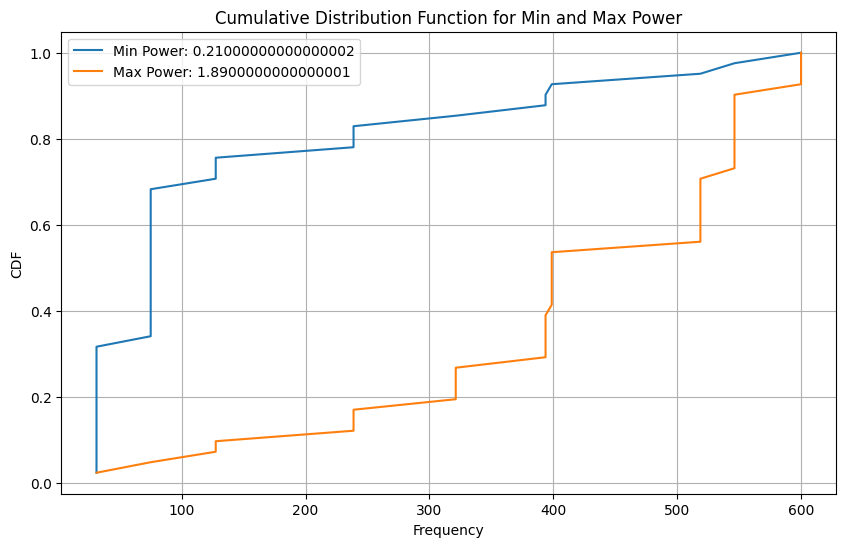

In [6]:
import matplotlib.pyplot as plt

# Assuming power_range has been computed as in your previous code
min_power = power_range[0]
max_power = power_range[1]

# Determine which DataFrame has fewer rows
df_less_cumuldist, df_more_cumuldist = (df1.copy(), df2.copy()) if len(df1) < len(df2) else (df2.copy(), df1.copy())

# Rename columns for clarity
df_less_cumuldist.columns = ['freq_data_less', 'amp_data_less']
df_more_cumuldist.columns = ['freq_data_more', 'amp_data_more']

# Apply spread_values with min and max power
df_more_cumuldist_min = df_more_cumuldist.copy()
df_more_cumuldist_max = df_more_cumuldist.copy()
spread_values(df_less_cumuldist, df_more_cumuldist_min, min_power)
spread_values(df_less_cumuldist, df_more_cumuldist_max, max_power)

# Sort frequencies for CDF
sorted_freq_min = np.sort(df_more_cumuldist_min['freq_data_less'])
sorted_freq_max = np.sort(df_more_cumuldist_max['freq_data_less'])

# Create CDF
y = np.arange(1, len(sorted_freq_min) + 1) / len(sorted_freq_min)

# Plot the CDF for min and max power
plt.figure(figsize=(10, 6))
plt.plot(sorted_freq_min, y, label=f'Min Power: {min_power}')
plt.plot(sorted_freq_max, y, label=f'Max Power: {max_power}')
plt.xlabel('Frequency')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function for Min and Max Power')
plt.legend()
plt.grid(True)
plt.show()


df merge according to set power value:

In [7]:
# Initial power value
power = 1.89

# Function to spread df_less values in df_more
def spread_values(df_less, df_more, power):
    # Generate the bins for each df_more value
    bins = np.linspace(0, 1, len(df_less))**power
    bins[0] = 0
    bins[-1] = 1
    thresholds = (bins[:-1] + bins[1:]) / 2
    df_more_assignment = np.linspace(0, 1, len(df_more), endpoint=False) + 0.5/len(df_more)

    # Redistribute df_more values to ensure each df_less bin is used at least once
    df_more_bins = np.digitize(df_more_assignment, thresholds)

    # Correct the bins exceeding the df_less's length
    df_more_bins = np.where(df_more_bins >= len(df_less), len(df_less)-1, df_more_bins)

    # Make sure the last value of df_more is always assigned to the last value of df_less
    df_more_bins[-1] = len(df_less) - 1

    # Make sure the first value of df_more is always assigned to the first value of df_less
    df_more_bins[0] = 0

    # Assign the df_less values to df_more based on the bins
    df_more['freq_data_less'] = df_less.freq_data_less.iloc[df_more_bins].values
    df_more['amp_data_less'] = df_less.amp_data_less.iloc[df_more_bins].values
    return df_more

# Determine which DataFrame has fewer rows
df_less, df_more = (df1.copy(), df2.copy()) if len(df1) < len(df2) else (df2.copy(), df1.copy())

# Rename columns for clarity
df_less.columns = ['freq_data_less', 'amp_data_less']
df_more.columns = ['freq_data_more', 'amp_data_more']

# Spread df_less values in df_more with the initial power
df_more_spread = spread_values(df_less, df_more, power)

# Set this to True if you want to swap the columns
should_swap = False

result_cumuldist = df_more_spread[['freq_data_less', 'amp_data_less', 'freq_data_more', 'amp_data_more']]

# Swap columns if needed
if should_swap:
    cols_to_swap1 = ['freq_data_less', 'amp_data_less']
    cols_to_swap2 = ['freq_data_more', 'amp_data_more']
    result_cumuldist = swap_columns(result_cumuldist, cols_to_swap1, cols_to_swap2)

# Rename the columns to the desired names
result_cumuldist.columns = ['freq_data1', 'amp_data1', 'freq_data2', 'amp_data2']

display(result_cumuldist)


,freq_data1,amp_data1,freq_data2,amp_data2
0,31.25,0.000569,97.368421,0.000965
1,75.00,0.000870,105.263158,0.005521
2,127.50,0.000540,110.526316,0.002423
3,127.50,0.000540,194.736842,0.001351
4,238.75,0.003074,202.631579,0.003517
5,238.75,0.003074,210.526316,0.007408
6,238.75,0.003074,215.789474,0.005467
7,321.25,0.002468,223.684211,0.004954
8,321.25,0.002468,228.947368,0.003144
9,321.25,0.002468,292.105263,0.001261


 **Sigmoid function distribution**

determine valid range:

In [10]:
import pandas as pd
import numpy as np
from scipy.special import expit

def sigmoid_spread(df_sigmoid_less, df_sigmoid_more, sigmoid_range):
    # Generate a sigmoid distribution for df_sigmoid_more
    num_bins_df_sigmoid_more = df_sigmoid_more.shape[0]
    sigmoid_bins_df_sigmoid_more = np.linspace(-6, 6, num_bins_df_sigmoid_more)
    sigmoid_distribution_df_sigmoid_more = expit(sigmoid_bins_df_sigmoid_more)

    # Generate a sigmoid distribution for df_sigmoid_less
    num_bins_df_sigmoid_less = df_sigmoid_less.shape[0]
    sigmoid_bins_df_sigmoid_less = np.linspace(-sigmoid_range, sigmoid_range, num_bins_df_sigmoid_less)
    sigmoid_distribution_df_sigmoid_less = expit(sigmoid_bins_df_sigmoid_less)

    # Create a mapping from bins to df_sigmoid_less values
    df_sigmoid_less_bins_to_values = {bin: value for bin, value in zip(sigmoid_distribution_df_sigmoid_less, df_sigmoid_less['freq_data_less'].values)}

    # For each value in sigmoid_distribution_df_sigmoid_more, find the closest bin in sigmoid_distribution_df_sigmoid_less and get the corresponding df_sigmoid_less value
    df_sigmoid_more_values = [df_sigmoid_less_bins_to_values[min(df_sigmoid_less_bins_to_values.keys(), key=lambda bin: abs(bin - value))] for value in sigmoid_distribution_df_sigmoid_more]

    # Return True if all df_sigmoid_less values are present in the resulting df_sigmoid_more, and False otherwise
    return set(df_sigmoid_less['freq_data_less'].values) <= set(df_sigmoid_more_values)

# Determine which DataFrame has fewer rows
df_sigmoid_less, df_sigmoid_more = (df1.copy(), df2.copy()) if len(df1) < len(df2) else (df2.copy(), df1.copy())

# Rename columns for clarity
df_sigmoid_less.columns = ['freq_data_less', 'amp_data_less']
df_sigmoid_more.columns = ['freq_data_more', 'amp_data_more']

# Test different sigmoid_range values to find the range that ensures all df_sigmoid_less values are present in df_sigmoid_more
sigmoid_range_values = np.linspace(0.01, 100, 10000)
valid_sigmoid_ranges = [sigmoid_range for sigmoid_range in sigmoid_range_values if sigmoid_spread(df_sigmoid_less, df_sigmoid_more.copy(), sigmoid_range)]

# The min and max values for sigmoid_range
sigmoid_range = [min(valid_sigmoid_ranges), max(valid_sigmoid_ranges)]
print("Sigmoid range:", sigmoid_range)


Sigmoid range: [1.36, 7.06]


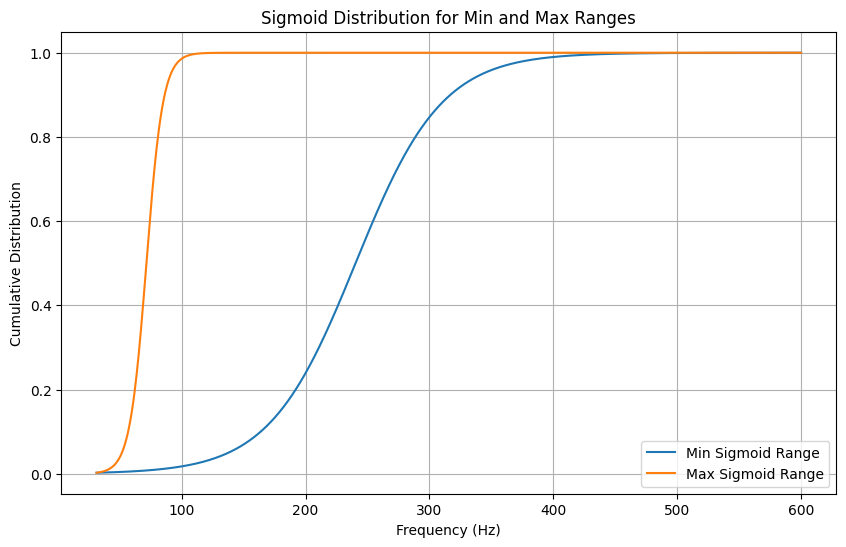

In [11]:
import matplotlib.pyplot as plt
from scipy.special import expit

# Get min and max frequency values from df_sigmoid_less
min_freq = df_sigmoid_less['freq_data_less'].min()
max_freq = df_sigmoid_less['freq_data_less'].max()

# Generate a sigmoid distribution for the min and max ranges
num_bins = 1000  # Set this to the number of bins you want for your plot
sigmoid_bins = np.linspace(min_freq, max_freq, num_bins)

min_sigmoid_distribution = expit((sigmoid_bins - min_freq) / (max_freq - min_freq) * 12 * sigmoid_range[0] - 6)
max_sigmoid_distribution = expit((sigmoid_bins - min_freq) / (max_freq - min_freq) * 12 * sigmoid_range[1] - 6)

# Create a new figure and plot the distributions
plt.figure(figsize=(10, 6))
plt.plot(sigmoid_bins, min_sigmoid_distribution, label='Min Sigmoid Range')
plt.plot(sigmoid_bins, max_sigmoid_distribution, label='Max Sigmoid Range')
plt.title('Sigmoid Distribution for Min and Max Ranges')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Cumulative Distribution')
plt.legend()
plt.grid()
plt.show()


df merge according to set sigmoid range:

In [16]:
# Set the sigmoid range
sigmoid_range = 1.37 # Set this to control the range of the sigmoid function for df_sigmoid_less

# Generate a sigmoid distribution for df_sigmoid_less
num_bins_df_less = df_sigmoid_less.shape[0]
sigmoid_bins_df_less = np.linspace(-sigmoid_range, sigmoid_range, num_bins_df_less)
sigmoid_distribution_df_less = expit(sigmoid_bins_df_less)

# Create a mapping from bins to df_sigmoid_less values
df_less_bins_to_values = {bin: value for bin, value in zip(sigmoid_distribution_df_less, df_sigmoid_less['freq_data_less'].values)}

# Generate a sigmoid distribution for df_sigmoid_more
num_bins_df_more = df_sigmoid_more.shape[0]  # Set this to the number of bins you want for df_sigmoid_more
sigmoid_bins_df_more = np.linspace(-6, 6, num_bins_df_more)
sigmoid_distribution_df_more = expit(sigmoid_bins_df_more)

# For each value in sigmoid_distribution_df_more, find the closest bin in sigmoid_distribution_df_less and get the corresponding df_sigmoid_less value
df_more_values = [df_less_bins_to_values[min(df_less_bins_to_values.keys(), key=lambda bin: abs(bin - value))] for value in sigmoid_distribution_df_more]

# Add these values to df_sigmoid_more
df_sigmoid_more['freq_data_less'] = df_more_values
df_sigmoid_more['amp_data_less'] = df_sigmoid_less.set_index('freq_data_less').loc[df_sigmoid_more['freq_data_less']]['amp_data_less'].values

# Set this to True if you want to swap the columns
should_swap = True

# Define the final DataFrame
result_sigmoid = df_sigmoid_more[['freq_data_less', 'amp_data_less', 'freq_data_more', 'amp_data_more']]

# Swap columns if needed
if should_swap:
    cols_to_swap1 = ['freq_data_less', 'amp_data_less']
    cols_to_swap2 = ['freq_data_more', 'amp_data_more']
    result_sigmoid = swap_columns(result_sigmoid, cols_to_swap1, cols_to_swap2)

# Rename the columns in the final DataFrame
column_mapping = {
    'freq_data_more': 'freq_data1', 
    'amp_data_more': 'amp_data1',
    'freq_data_less': 'freq_data2',
    'amp_data_less': 'amp_data2'
}

result_sigmoid = result_sigmoid.rename(columns=column_mapping)

display(result_sigmoid)


,freq_data2,amp_data2,freq_data1,amp_data1
0,97.368421,0.000965,31.25,0.000569
1,105.263158,0.005521,31.25,0.000569
2,110.526316,0.002423,31.25,0.000569
3,194.736842,0.001351,31.25,0.000569
4,202.631579,0.003517,31.25,0.000569
5,210.526316,0.007408,31.25,0.000569
6,215.789474,0.005467,31.25,0.000569
7,223.684211,0.004954,31.25,0.000569
8,228.947368,0.003144,31.25,0.000569
9,292.105263,0.001261,31.25,0.000569


Add value for transition duration

In [17]:
import pandas as pd
import numpy as np
from multiplotter import plot_combined

def process_df(input_df, freq_start_col, amp_start_col, freq_stop_col, amp_stop_col, wave_stop_value, override_amp_value=None, scale_amp_value=True):
    # Scaling amplitude if required
    if scale_amp_value:
        amp_start_scaled = input_df[amp_start_col] / input_df[amp_start_col].max()
        amp_stop_max = input_df[amp_stop_col] / input_df[amp_stop_col].max()
    else:
        amp_start_scaled = input_df[amp_start_col]
        amp_stop_max = input_df[amp_stop_col]
    
    # Overriding amplitude values if required
    if override_amp_value is not None:
        amp_min = [override_amp_value] * len(input_df)
        amp_max = [override_amp_value] * len(input_df)
    else:
        amp_min = amp_start_scaled
        amp_max = amp_stop_max

    new_data = {
        "freq_start": input_df[freq_start_col],
        "freq_stop": input_df[freq_stop_col],
        "time_start": [0.0] * len(input_df),
        "time_stop": [wave_stop_value] * len(input_df),
        "amp_min": amp_min,
        "amp_max": amp_max
    }
    
    return pd.DataFrame(new_data)

wave_stop_value = 15.0
override_amp_value = None
scale_amp_value = True

new_df = process_df(result_sigmoid, 'freq_data1', 'amp_data1', 'freq_data2', 'amp_data2', wave_stop_value, override_amp_value, scale_amp_value)
display(new_df)

,freq_start,freq_stop,time_start,time_stop,amp_min,amp_max
0,31.25,97.368421,0.0,15.0,0.185020,0.127585
1,31.25,105.263158,0.0,15.0,0.185020,0.730145
2,31.25,110.526316,0.0,15.0,0.185020,0.320386
3,31.25,194.736842,0.0,15.0,0.185020,0.178615
4,31.25,202.631579,0.0,15.0,0.185020,0.465142
5,31.25,210.526316,0.0,15.0,0.185020,0.979685
6,31.25,215.789474,0.0,15.0,0.185020,0.722938
7,31.25,223.684211,0.0,15.0,0.185020,0.655112
8,31.25,228.947368,0.0,15.0,0.185020,0.415782
9,31.25,292.105263,0.0,15.0,0.185020,0.166797


Save your data as TSV with time domain data

In [20]:
import os
from datetime import datetime

# Define the path for the /tsv subfolder
output_directory = 'tsv'

# Check if the directory exists; if not, create it
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Define the filename path to save inside the /tsv subfolder
filename = os.path.join(output_directory, 'sigmoid_low.tsv')

try:
    new_df.to_csv(filename, sep='\t', index=False)
    print(f"Data saved successfully to {os.path.abspath(filename)} at {datetime.now()}.")
except:
    print("Error: data could not be saved.")


Data saved successfully to /Users/egor/Documents/GitHub/audiospylt/tsv/sigmoid_low.tsv at 2023-09-24 17:45:15.146436.
